In [ ]:
import pandas as pd

In [ ]:
# Carga del archivo Excel
from google.colab import files
#uploaded = files.upload()

# Lectura del archivo
df = pd.read_excel("limpioML.xlsx")

# Visualización inicial

In [ ]:
df.head(50)

,Mes,CHUQUISACA,COCHABAMBA,TARIJA,SANTA CRUZ,Anhos
0,1,52441.0,429738.0,97065.84,356627.0,2001
1,2,46208.0,390136.0,71270.00,322102.0,2001
2,3,51404.0,430387.0,81563.00,375845.0,2001
3,4,48733.0,403865.0,77640.00,357124.0,2001
4,5,48921.0,431071.0,113910.00,395762.0,2001
5,6,46873.0,416853.0,103278.00,378304.0,2001
6,7,47002.0,435491.0,109615.00,382833.0,2001
7,8,48146.0,396781.0,102436.00,371585.0,2001
8,9,46740.0,405409.0,110023.00,403310.0,2001
9,10,48618.0,433334.0,130405.00,394475.0,2001


In [ ]:
df.head()

,Mes,CHUQUISACA,COCHABAMBA,TARIJA,SANTA CRUZ,Anhos
0,1,52441.0,429738.0,97065.84,356627.0,2001
1,2,46208.0,390136.0,71270.00,322102.0,2001
2,3,51404.0,430387.0,81563.00,375845.0,2001
3,4,48733.0,403865.0,77640.00,357124.0,2001
4,5,48921.0,431071.0,113910.00,395762.0,2001


# CHUQUISACA


 Mejor modelo encontrado:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}

📊 Evaluación del modelo - CHUQUISACA:
MAE  = 12274.88
RMSE = 16389.32
R²   = 0.4860


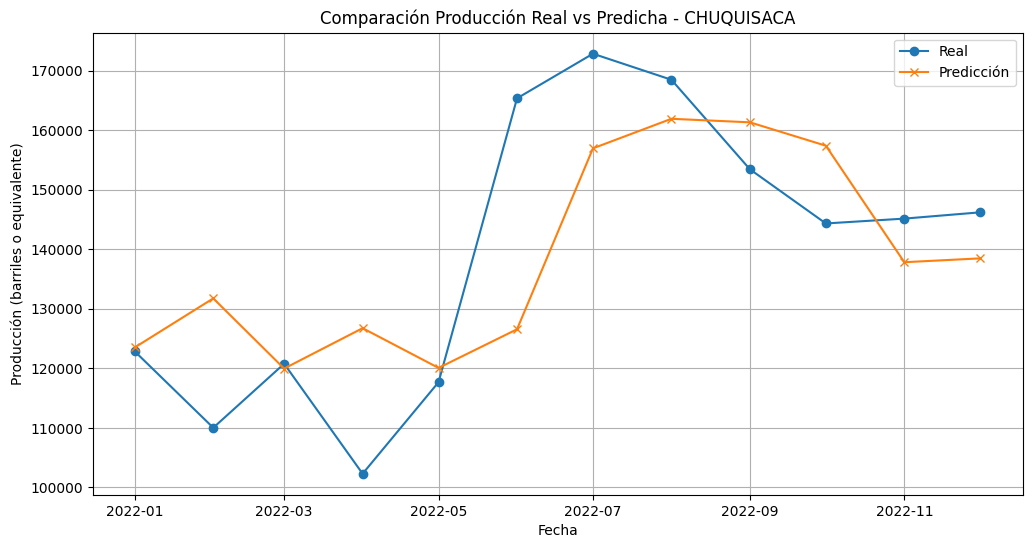

In [ ]:
# ============================================
# 1️ Importación de librerías
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, TimeSeriesSplit, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ============================================
# 2️ Preparación de datos
# ============================================

# Filtrar solo CHUQUISACA
chuquisaca = df[['Anhos', 'Mes', 'CHUQUISACA']].copy()
chuquisaca.rename(columns={'CHUQUISACA': 'Produccion'}, inplace=True)

# Crear variables de rezago (lags)
for i in range(1, 13):  # lags de 1 a 12 meses
    chuquisaca[f'Lag_{i}'] = chuquisaca['Produccion'].shift(i)

# Variable de tendencia temporal
chuquisaca['Tendencia'] = np.arange(len(chuquisaca))

# Eliminar las filas con valores NaN (al inicio por los lags)
chuquisaca = chuquisaca.dropna()

# ============================================
# 3️ División entrenamiento y prueba (último año como test)
# ============================================
X = chuquisaca.drop(columns=['Produccion'])
y = chuquisaca['Produccion']

# Tomamos el último año (12 meses) para test
X_train = X.iloc[:-12]
y_train = y.iloc[:-12]
X_test = X.iloc[-12:]
y_test = y.iloc[-12:]

# ============================================
# 4️ Modelo Random Forest con búsqueda de hiperparámetros
# ============================================

# Definición del modelo base
rf = RandomForestRegressor(random_state=42)

# Espacio de búsqueda
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Validación cruzada temporal
tscv = TimeSeriesSplit(n_splits=5)

# Búsqueda aleatoria
search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=tscv,
    random_state=42,
    n_jobs=-1
)

# Entrenar
search.fit(X_train, y_train)
best_model = search.best_estimator_

print(" Mejor modelo encontrado:")
print(search.best_params_)

# ============================================
# 5️ Evaluación del modelo
# ============================================
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📊 Evaluación del modelo - CHUQUISACA:")
print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.4f}")

# ============================================
# 6️ Gráfico comparativo Real vs Predicho
# ============================================
# Crear DataFrame comparativo
resultado = pd.DataFrame({
    'Fecha': pd.to_datetime(X_test['Anhos'].astype(str) + '-' + X_test['Mes'].astype(str) + '-01'),
    'Real': y_test.values,
    'Prediccion': y_pred
}).sort_values('Fecha')

# Graficar
plt.figure(figsize=(12,6))
plt.plot(resultado['Fecha'], resultado['Real'], label='Real', marker='o')
plt.plot(resultado['Fecha'], resultado['Prediccion'], label='Predicción', marker='x')
plt.title('Comparación Producción Real vs Predicha - CHUQUISACA')
plt.xlabel('Fecha')
plt.ylabel('Producción (barriles o equivalente)')
plt.legend()
plt.grid(True)
plt.show()


# COCHABAMBA

 Mejor modelo encontrado:
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Evaluación del modelo - COCHABAMBA:
MAE  = 6427.74
RMSE = 6709.77
R²   = -10.2423


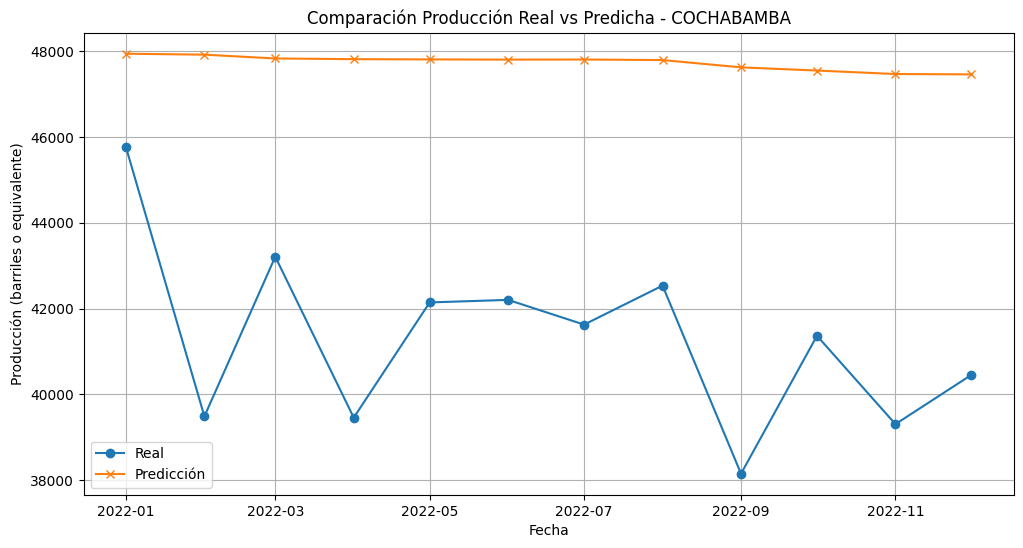

In [ ]:
# ============================================
# 1️ Importación de librerías
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, TimeSeriesSplit, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ============================================
# 2️ Preparación de datos
# ============================================

# Filtrar solo COCHABAMBA
cochabamba = df[['Anhos', 'Mes', 'COCHABAMBA']].copy()
cochabamba.rename(columns={'COCHABAMBA': 'Produccion'}, inplace=True)

# Crear variables de rezago (lags)
for i in range(1, 13):  # lags de 1 a 12 meses
    cochabamba[f'Lag_{i}'] = cochabamba['Produccion'].shift(i)

# Variable de tendencia temporal
cochabamba['Tendencia'] = np.arange(len(cochabamba))

# Eliminar las filas con valores NaN (al inicio por los lags)
cochabamba = cochabamba.dropna()

# ============================================
# 3️ División entrenamiento y prueba (último año como test)
# ============================================
X = cochabamba.drop(columns=['Produccion'])
y = cochabamba['Produccion']

# Tomamos el último año (12 meses) para test
X_train = X.iloc[:-12]
y_train = y.iloc[:-12]
X_test = X.iloc[-12:]
y_test = y.iloc[-12:]

# ============================================
# 4️ Modelo Random Forest con búsqueda de hiperparámetros
# ============================================

# Definición del modelo base
rf = RandomForestRegressor(random_state=42)

# Espacio de búsqueda
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Validación cruzada temporal
tscv = TimeSeriesSplit(n_splits=5)

# Búsqueda aleatoria
search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=tscv,
    random_state=42,
    n_jobs=-1
)

# Entrenar
search.fit(X_train, y_train)
best_model = search.best_estimator_

print(" Mejor modelo encontrado:")
print(search.best_params_)

# ============================================
# 5️ Evaluación del modelo
# ============================================
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Evaluación del modelo - COCHABAMBA:")
print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.4f}")

# ============================================
# 6️ Gráfico comparativo Real vs Predicho
# ============================================
# Crear DataFrame comparativo
resultado = pd.DataFrame({
    'Fecha': pd.to_datetime(X_test['Anhos'].astype(str) + '-' + X_test['Mes'].astype(str) + '-01'),
    'Real': y_test.values,
    'Prediccion': y_pred
}).sort_values('Fecha')

# Graficar
plt.figure(figsize=(12,6))
plt.plot(resultado['Fecha'], resultado['Real'], label='Real', marker='o')
plt.plot(resultado['Fecha'], resultado['Prediccion'], label='Predicción', marker='x')
plt.title('Comparación Producción Real vs Predicha - COCHABAMBA')
plt.xlabel('Fecha')
plt.ylabel('Producción (barriles o equivalente)')
plt.legend()
plt.grid(True)
plt.show()


# SANTA CRUZ

 Mejor modelo encontrado:
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}

📊 Evaluación del modelo - SANTA CRUZ:
MAE  = 14416.38
RMSE = 17038.65
R²   = -0.1026


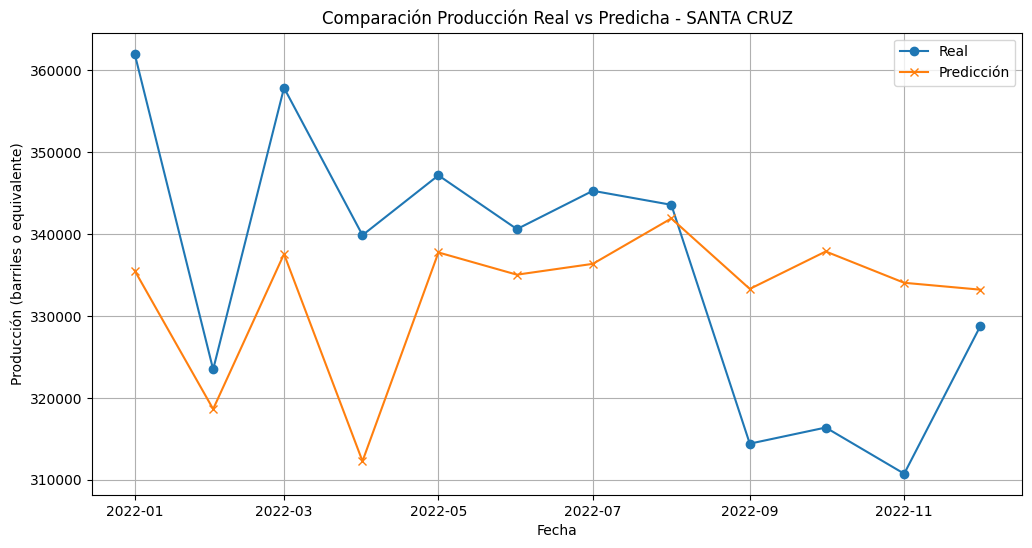

In [ ]:
# ============================================
# 1️ Importación de librerías
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, TimeSeriesSplit, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ============================================
# 2️ Preparación de datos
# ============================================

# Filtrar solo SANTA CRUZ
santaCruz = df[['Anhos', 'Mes', 'SANTA CRUZ']].copy()
santaCruz.rename(columns={'SANTA CRUZ': 'Produccion'}, inplace=True)

# Crear variables de rezago (lags)
for i in range(1, 13):  # lags de 1 a 12 meses
    santaCruz[f'Lag_{i}'] = santaCruz['Produccion'].shift(i)

# Variable de tendencia temporal
santaCruz['Tendencia'] = np.arange(len(santaCruz))

# Eliminar las filas con valores NaN (al inicio por los lags)
santaCruz = santaCruz.dropna()

# ============================================
# 3️ División entrenamiento y prueba (último año como test)
# ============================================
X = santaCruz.drop(columns=['Produccion'])
y = santaCruz['Produccion']

# Tomamos el último año (12 meses) para test
X_train = X.iloc[:-12]
y_train = y.iloc[:-12]
X_test = X.iloc[-12:]
y_test = y.iloc[-12:]

# ============================================
# 4️ Modelo Random Forest con búsqueda de hiperparámetros
# ============================================

# Definición del modelo base
rf = RandomForestRegressor(random_state=42)

# Espacio de búsqueda
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Validación cruzada temporal
tscv = TimeSeriesSplit(n_splits=5)

# Búsqueda aleatoria
search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=tscv,
    random_state=42,
    n_jobs=-1
)

# Entrenar
search.fit(X_train, y_train)
best_model = search.best_estimator_

print(" Mejor modelo encontrado:")
print(search.best_params_)

# ============================================
# 5️ Evaluación del modelo
# ============================================
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📊 Evaluación del modelo - SANTA CRUZ:")
print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.4f}")

# ============================================
# 6️ Gráfico comparativo Real vs Predicho
# ============================================
# Crear DataFrame comparativo
resultado = pd.DataFrame({
    'Fecha': pd.to_datetime(X_test['Anhos'].astype(str) + '-' + X_test['Mes'].astype(str) + '-01'),
    'Real': y_test.values,
    'Prediccion': y_pred
}).sort_values('Fecha')

# Graficar
plt.figure(figsize=(12,6))
plt.plot(resultado['Fecha'], resultado['Real'], label='Real', marker='o')
plt.plot(resultado['Fecha'], resultado['Prediccion'], label='Predicción', marker='x')
plt.title('Comparación Producción Real vs Predicha - SANTA CRUZ')
plt.xlabel('Fecha')
plt.ylabel('Producción (barriles o equivalente)')
plt.legend()
plt.grid(True)
plt.show()


# TARIJA

 Mejor modelo encontrado:
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}

📊 Evaluación del modelo - TARIJA:
MAE  = 61823.05
RMSE = 67206.70
R²   = -3.9974


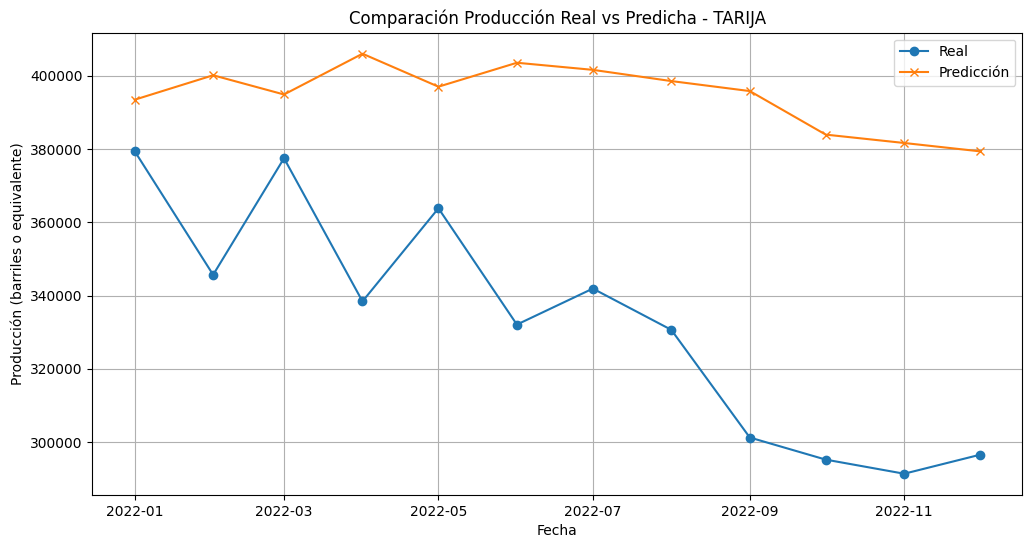

In [ ]:
# ============================================
# 1️ Importación de librerías
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, TimeSeriesSplit, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ============================================
# 2️ Preparación de datos
# ============================================

# Filtrar solo TARIJA
tarija = df[['Anhos', 'Mes', 'TARIJA']].copy()
tarija.rename(columns={'TARIJA': 'Produccion'}, inplace=True)

# Crear variables de rezago (lags)
for i in range(1, 13):  # lags de 1 a 12 meses
    tarija[f'Lag_{i}'] = tarija['Produccion'].shift(i)

# Variable de tendencia temporal
tarija['Tendencia'] = np.arange(len(tarija))

# Eliminar las filas con valores NaN (al inicio por los lags)
tarija = tarija.dropna()

# ============================================
# 3️ División entrenamiento y prueba (último año como test)
# ============================================
X = tarija.drop(columns=['Produccion'])
y = tarija['Produccion']

# Tomamos el último año (12 meses) para test
X_train = X.iloc[:-12]
y_train = y.iloc[:-12]
X_test = X.iloc[-12:]
y_test = y.iloc[-12:]

# ============================================
# 4️ Modelo Random Forest con búsqueda de hiperparámetros
# ============================================

# Definición del modelo base
rf = RandomForestRegressor(random_state=42)

# Espacio de búsqueda
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Validación cruzada temporal
tscv = TimeSeriesSplit(n_splits=5)

# Búsqueda aleatoria
search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=tscv,
    random_state=42,
    n_jobs=-1
)

# Entrenar
search.fit(X_train, y_train)
best_model = search.best_estimator_

print(" Mejor modelo encontrado:")
print(search.best_params_)

# ============================================
# 5️ Evaluación del modelo
# ============================================
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📊 Evaluación del modelo - TARIJA:")
print(f"MAE  = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.4f}")

# ============================================
# 6️ Gráfico comparativo Real vs Predicho
# ============================================
# Crear DataFrame comparativo
resultado = pd.DataFrame({
    'Fecha': pd.to_datetime(X_test['Anhos'].astype(str) + '-' + X_test['Mes'].astype(str) + '-01'),
    'Real': y_test.values,
    'Prediccion': y_pred
}).sort_values('Fecha')

# Graficar
plt.figure(figsize=(12,6))
plt.plot(resultado['Fecha'], resultado['Real'], label='Real', marker='o')
plt.plot(resultado['Fecha'], resultado['Prediccion'], label='Predicción', marker='x')
plt.title('Comparación Producción Real vs Predicha - TARIJA')
plt.xlabel('Fecha')
plt.ylabel('Producción (barriles o equivalente)')
plt.legend()
plt.grid(True)
plt.show()

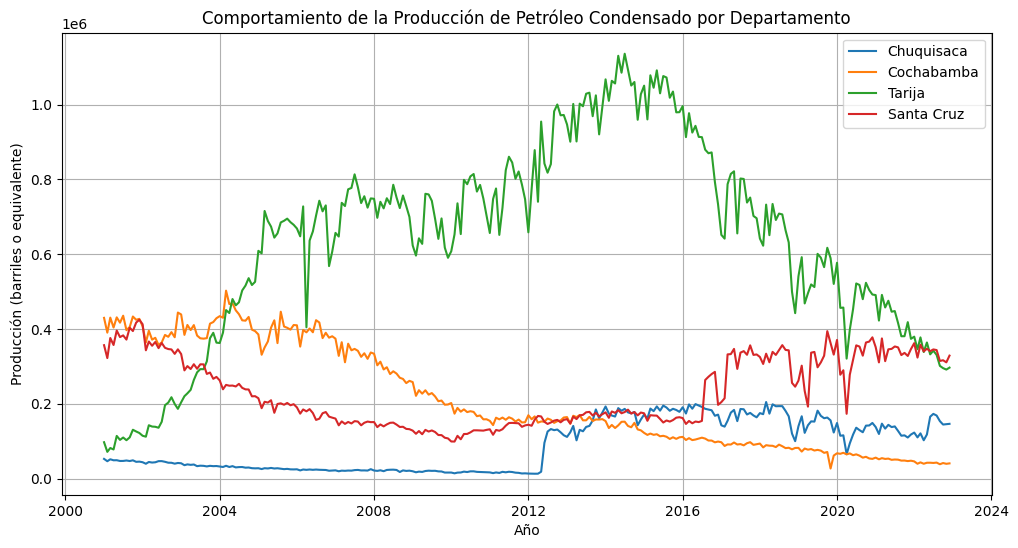

In [ ]:
# Crear columna de fecha combinando año y mes
df['Fecha'] = pd.to_datetime(df['Anhos'].astype(str) + '-' + df['Mes'].astype(str) + '-01')

# Graficar producción por departamento
plt.figure(figsize=(12,6))
plt.plot(df['Fecha'], df['CHUQUISACA'], label='Chuquisaca')
plt.plot(df['Fecha'], df['COCHABAMBA'], label='Cochabamba')
plt.plot(df['Fecha'], df['TARIJA'], label='Tarija')
plt.plot(df['Fecha'], df['SANTA CRUZ'], label='Santa Cruz')

plt.title('Comportamiento de la Producción de Petróleo Condensado por Departamento')
plt.xlabel('Año')
plt.ylabel('Producción (barriles o equivalente)')
plt.legend()
plt.grid(True)
plt.show()